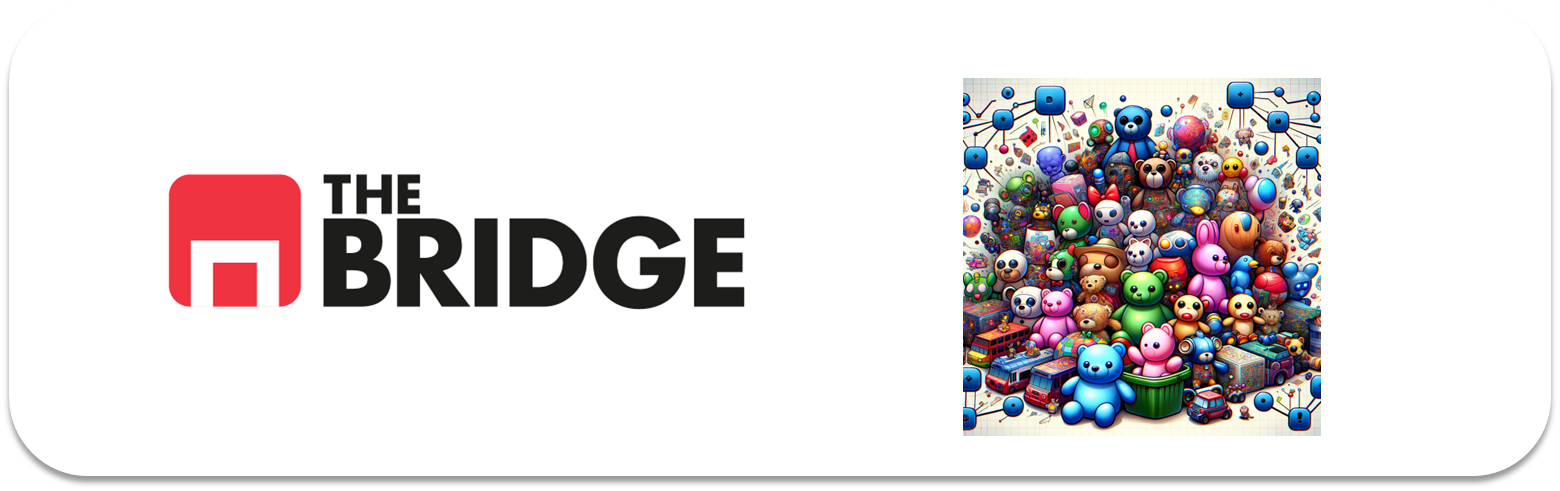

## PRACTICA OBLIGATORIA: **K-Means Clustering**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [4]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Reducción dimensional
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [5]:
from sklearn.datasets import fetch_olivetti_faces

# Cargar el dataset
data = fetch_olivetti_faces()

# Mostrar la descripción
print(data["DESCR"])


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [3]:
X = data.data          # 400 x 4096
y = data.target        # etiquetas reales (0–39)

X.shape, y.shape

((400, 4096), (400,))

In [9]:
df = pd.DataFrame(X)
df["target"] = y

df.head()



,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, 0 to target
dtypes: float32(4096), int64(1)
memory usage: 6.3 MB


In [11]:
#reordenar aleatoriamente

df_shuffled=df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
df_shuffled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9
5,0.520661,0.533058,0.541322,0.578512,0.623967,0.640496,0.648760,0.640496,0.648760,0.644628,...,0.425620,0.450413,0.400826,0.388430,0.367769,0.309917,0.371901,0.367769,0.355372,8
6,0.136364,0.119835,0.132231,0.111570,0.119835,0.123967,0.123967,0.128099,0.132231,0.144628,...,0.508264,0.619835,0.685950,0.479339,0.388430,0.533058,0.640496,0.657025,0.640496,32
7,0.247934,0.347107,0.466942,0.508264,0.574380,0.615702,0.669421,0.694215,0.710744,0.723140,...,0.070248,0.082645,0.078512,0.074380,0.082645,0.074380,0.111570,0.123967,0.119835,9
8,0.334711,0.388430,0.491736,0.623967,0.735537,0.764463,0.756198,0.764463,0.780992,0.801653,...,0.057851,0.082645,0.086777,0.078512,0.111570,0.107438,0.144628,0.161157,0.185950,26
9,0.285124,0.285124,0.272727,0.214876,0.169421,0.165289,0.264463,0.446281,0.491736,0.541322,...,0.342975,0.326446,0.322314,0.301653,0.289256,0.305785,0.301653,0.309917,0.314050,12


In [15]:
X_shuffled=df_shuffled.drop("target", axis=1).values
y_shuffled= df_shuffled["target"].values

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_shuffled,
    y_shuffled,
    test_size=0.2,
    stratify=y_shuffled,
    random_state=42
)

In [17]:
X_train.shape  # (320, 4096)
X_temp.shape   # (80, 4096)

(80, 4096)

### #1.4

Crea los pares X,y para train, validation y test.

In [ ]:
#Como X_temp es 20% ahora lo dividimos en dos mitades

In [18]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

In [19]:
X_val.shape   # (40, 4096)
X_test.shape  # (40, 4096)

(40, 4096)

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [20]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

In [21]:
#trabajando con dataframes
df_train = pd.DataFrame(X_train)
df_train["target"] = y_train

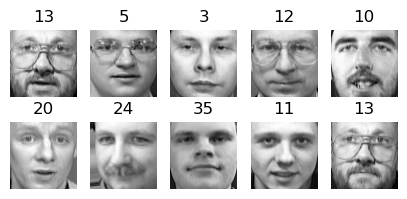

In [22]:
plot_faces(
    df_train.iloc[:10, :-1].values,   # X
    df_train.iloc[:10, -1].values,    # y
    n_cols=5
)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [24]:
from sklearn.decomposition import PCA

pca = PCA(0.99)  # conservamos solo el 99% de la varianza
X_train_pca = pca.fit_transform(X_train)  #ajustar SOLO con train
X_valid_pca = pca.transform(X_val) #Transformamos val y test con el mismo PCA
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(221)

In [26]:
#Partimos de 4096 dimensiones
#Con 99% varianza suele bajar a ~100–150 componentes aproximadamente
X_train.shape

(320, 4096)

In [28]:
X_train_pca.shape  #hemos reducido las features a 221

(320, 221)

In [29]:
print("Dimensión original:", X_train.shape[1])
print("Dimensión reducida:", X_train_pca.shape[1])

Dimensión original: 4096
Dimensión reducida: 221


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [30]:
silhouette_scores = []
k_values = range(5, 151, 5)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, labels)
    silhouette_scores.append(score)
    print(f"k={k} → silhouette={score:.4f}")

# Encontrar mejor k
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print("\nMejor k:", best_k)
print("Mejor silhouette score:", best_score)

  File "C:\Users\USUARIO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\USUARIO\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USUARIO\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USUARIO\anaconda3\Lib\sub

k=5 → silhouette=0.1069
k=10 → silhouette=0.0918
k=15 → silhouette=0.0969
k=20 → silhouette=0.1089
k=25 → silhouette=0.1189
k=30 → silhouette=0.1302
k=35 → silhouette=0.1406
k=40 → silhouette=0.1508
k=45 → silhouette=0.1597
k=50 → silhouette=0.1710
k=55 → silhouette=0.1687
k=60 → silhouette=0.1802
k=65 → silhouette=0.1804
k=70 → silhouette=0.1882
k=75 → silhouette=0.1966
k=80 → silhouette=0.1973
k=85 → silhouette=0.1887
k=90 → silhouette=0.1985
k=95 → silhouette=0.2014
k=100 → silhouette=0.2017
k=105 → silhouette=0.2027
k=110 → silhouette=0.2031
k=115 → silhouette=0.2061
k=120 → silhouette=0.2088
k=125 → silhouette=0.2082
k=130 → silhouette=0.2054
k=135 → silhouette=0.2057
k=140 → silhouette=0.1992
k=145 → silhouette=0.2037
k=150 → silhouette=0.1983

Mejor k: 120
Mejor silhouette score: 0.20884573


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

k=5 → inertia=17016.09
k=10 → inertia=14948.44
k=15 → inertia=13548.20
k=20 → inertia=12366.64
k=25 → inertia=11310.17
k=30 → inertia=10582.36
k=35 → inertia=9852.67
k=40 → inertia=9141.86
k=45 → inertia=8523.20
k=50 → inertia=8007.92
k=55 → inertia=7662.91
k=60 → inertia=7236.36
k=65 → inertia=6849.46
k=70 → inertia=6484.29
k=75 → inertia=6057.56
k=80 → inertia=5812.49
k=85 → inertia=5542.09
k=90 → inertia=5298.30
k=95 → inertia=4956.75
k=100 → inertia=4725.63
k=105 → inertia=4462.27
k=110 → inertia=4230.31
k=115 → inertia=4023.39
k=120 → inertia=3836.42
k=125 → inertia=3605.45
k=130 → inertia=3414.31
k=135 → inertia=3275.61
k=140 → inertia=3095.17
k=145 → inertia=2925.19
k=150 → inertia=2753.25


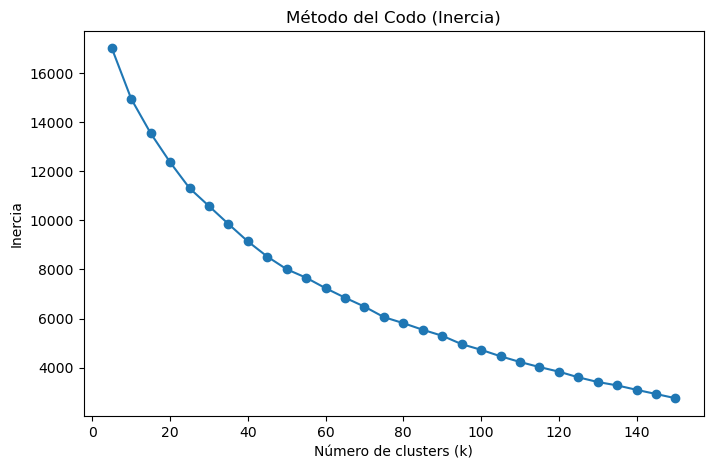

In [31]:
inertias = []
k_values = range(5, 151, 5)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)
    print(f"k={k} → inertia={kmeans.inertia_:.2f}")

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo (Inercia)")
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [32]:
from sklearn.cluster import KMeans

# Crear el modelo con el mejor K encontrado
best_model = KMeans(n_clusters=120, random_state=42)

# Ajustar el modelo a tus datos (si aún no lo has hecho)
best_model.fit(X_train_pca)   # Usa aquí tu matriz de características


KMeans(n_clusters=120, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

In [ ]:
#X_train_pca NO contiene imágenes reales Son componentes principales (espacio reducido)


In [33]:
#Por tanto:

#El clustering se ha hecho sobre X_train_pca

#Pero para visualizar caras debemos usar X_train original (4096 píxeles)

In [34]:
labels = best_model.labels_  #se obtienen etiquetas del modelo. Estas etiquetas corresponden a X_train_pca, pero el orden es exactamente igual que X_train

Pintar los 10 primeros clusteres

In [ ]:
#Recorrer clusters 0–9
#Seleccionar las imágenes originales correspondientes
#Visualizarlas con plot_faces


Cluster 0 — 7 imágenes


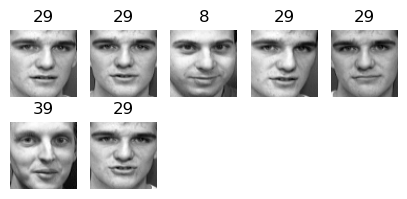


Cluster 1 — 5 imágenes


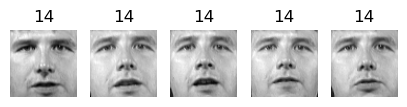


Cluster 2 — 2 imágenes


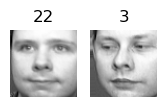


Cluster 3 — 3 imágenes


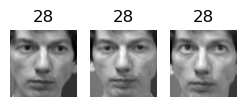


Cluster 4 — 1 imágenes


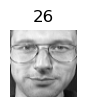


Cluster 5 — 5 imágenes


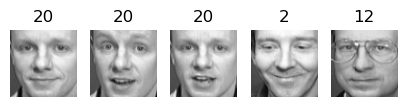


Cluster 6 — 2 imágenes


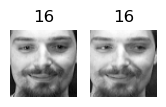


Cluster 7 — 3 imágenes


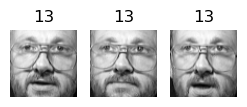


Cluster 8 — 2 imágenes


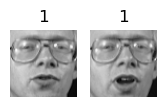


Cluster 9 — 7 imágenes


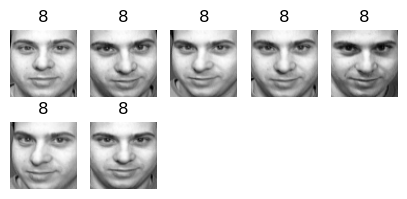

In [35]:
for cluster_id in range(10):
    
    # Seleccionar índices de ese cluster
    cluster_indices = np.where(labels == cluster_id)[0]
    
    print(f"\nCluster {cluster_id} — {len(cluster_indices)} imágenes")
    
    # Mostrar hasta 10 caras por cluster
    plot_faces(
        X_train[cluster_indices][:10],   # OJO: usamos X_train original
        y_train[cluster_indices][:10],   # Etiquetas reales (opcional)
        n_cols=5
    )

Con K = 120:
Muchos clusters tendrán 2–3 imágenes
Algunos pueden tener solo 1
Probablemente verás:

Caras muy similares dentro de un cluster
Pero también clusters fragmentados (una misma persona repartida)
Esto ocurre porque:
Hay 40 personas
Has elegido 120 clusters
Estás forzando una subdivisión artificial

Valoración del método con K = 120
Normalmente se observa:  
🔹 Aspectos positivos  
Caras dentro del cluster suelen compartir:
Iluminación similar
Posición parecida

Expresión similar  
🔹 Aspectos negativos
Una misma persona aparece en varios clusters
Sobre-segmentación evidente
Modelo demasiado granular

In [36]:
#cuanto se parecen los cluster a las personas reales
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_train, labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.4175321741871093


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [38]:
rf = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [39]:
y_val_pred = rf.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy en validación:", accuracy)

Accuracy en validación: 0.925


In [40]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.50    

In [41]:
y_test_pred = rf.predict(X_test)
print("Accuracy en test:", accuracy_score(y_test, y_test_pred))

Accuracy en test: 0.975


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [42]:
best_model = KMeans(n_clusters=120, random_state=42)
best_model.fit(X_train_pca)

KMeans(n_clusters=120, random_state=42)

In [45]:
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced   = best_model.transform(X_valid_pca)
X_test_reduced  = best_model.transform(X_test_pca)

X_train_reduced.shape

(320, 120)

In [46]:
#Entrenar RF con espacio reducido
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_reduced = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

rf_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [47]:
y_val_pred_reduced = rf_reduced.predict(X_val_reduced)

accuracy_reduced = accuracy_score(y_val, y_val_pred_reduced)

print("Accuracy con reducción KMeans:", accuracy_reduced)

Accuracy con reducción KMeans: 0.8


In [48]:
print(classification_report(y_val, y_val_pred_reduced))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
          17       1.00    

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [49]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ---- 1. Cargar y dividir datos ----
data = fetch_olivetti_faces()
X = data.data
y = data.target

# División estratificada
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5,
                                                stratify=y_temp,
                                                random_state=42)

# ---- 2. Reducir con PCA ----
pca = PCA(n_components=0.99, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca   = pca.transform(X_val)
X_test_pca  = pca.transform(X_test)

# ---- 3. Probar distintas k de KMeans ----
k_values = list(range(10, 151, 10))
results = []

for k in k_values:
    # Entrenar KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)

    # Transformar a distancias
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced   = kmeans.transform(X_val_pca)

    # Entrenar RandomForest
    rf = RandomForestClassifier(n_estimators=150, random_state=42)
    rf.fit(X_train_reduced, y_train)

    # Validar
    y_val_pred = rf.predict(X_val_reduced)
    acc = accuracy_score(y_val, y_val_pred)

    results.append((k, acc))
    print(f"k={k} -> accuracy={acc:.4f}")

# ---- 4. Encontrar mejor k ----
best_k, best_acc = max(results, key=lambda x: x[1])
print("\n===== RESULTADO =====")
print(f"Mejor k: {best_k}")
print(f"Mejor accuracy en validación: {best_acc:.4f}")

# ---- 5. Opcional: evaluar en test con ese k ----
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_kmeans.fit(X_train_pca)

X_train_red = best_kmeans.transform(X_train_pca)
X_test_red  = best_kmeans.transform(X_test_pca)

best_rf = RandomForestClassifier(n_estimators=150, random_state=42)
best_rf.fit(X_train_red, y_train)

y_test_pred = best_rf.predict(X_test_red)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en test con k={best_k}: {test_acc:.4f}")

k=10 -> accuracy=0.4750
k=20 -> accuracy=0.6000
k=30 -> accuracy=0.7250
k=40 -> accuracy=0.7250
k=50 -> accuracy=0.7500
k=60 -> accuracy=0.7750
k=70 -> accuracy=0.7750
k=80 -> accuracy=0.7250
k=90 -> accuracy=0.8000
k=100 -> accuracy=0.8000
k=110 -> accuracy=0.8000
k=120 -> accuracy=0.7500
k=130 -> accuracy=0.7500
k=140 -> accuracy=0.7750
k=150 -> accuracy=0.8250

===== RESULTADO =====
Mejor k: 150
Mejor accuracy en validación: 0.8250
Accuracy en test con k=150: 0.8000
